# COVID-19 State Data

In [207]:
#import of librairies
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
print("Libs loaded with success ! Let's work this out... :)")

Libs loaded with success ! Let's work this out... :)


# 1 - Retrieving the data set 

In [176]:
df = pd.read_csv('./Data/COVID19_state.csv');

# 2 - Getting infos

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State                51 non-null     object 
 1   Tested               51 non-null     int64  
 2   Infected             51 non-null     int64  
 3   Deaths               51 non-null     int64  
 4   Population           51 non-null     int64  
 5   Pop Density          51 non-null     float64
 6   Gini                 51 non-null     float64
 7   ICU Beds             51 non-null     int64  
 8   Income               51 non-null     int64  
 9   GDP                  51 non-null     int64  
 10  Unemployment         51 non-null     float64
 11  Sex Ratio            51 non-null     float64
 12  Smoking Rate         51 non-null     float64
 13  Flu Deaths           51 non-null     float64
 14  Respiratory Deaths   51 non-null     float64
 15  Physicians           51 non-null     int64

In [178]:
dfCorr = df.iloc[:,-15:].corr(); dfCorr

,Sex Ratio,Smoking Rate,Flu Deaths,Respiratory Deaths,Physicians,Hospitals,Health Spending,Pollution,Med-Large Airports,Temperature,Urban,Age 0-25,Age 26-54,Age 55+
Sex Ratio,1.000000,-0.075220,-0.150813,0.074163,-0.234541,-0.110359,-0.037857,-0.381696,-0.092927,-0.650249,-0.196080,0.350469,-0.297696,-0.118238
Smoking Rate,-0.075220,1.000000,0.459029,0.782544,-0.262743,-0.007701,-0.003635,-0.068500,-0.258708,0.118119,-0.613050,0.045718,-0.312298,0.226318
Flu Deaths,-0.150813,0.459029,1.000000,0.426914,-0.060320,-0.008476,-0.144244,-0.084198,-0.101501,0.326962,-0.303001,0.143214,-0.286500,0.079989
Respiratory Deaths,0.074163,0.782544,0.426914,1.000000,-0.299129,0.022939,-0.347737,-0.035793,-0.270746,0.127467,-0.634858,0.222900,-0.465228,0.192187
Physicians,-0.234541,-0.262743,-0.060320,-0.299129,1.000000,0.770096,-0.057821,0.525119,0.851319,0.232246,0.443739,-0.047444,0.237321,-0.158354
Hospitals,-0.110359,-0.007701,-0.008476,0.022939,0.770096,1.000000,-0.309285,0.483858,0.780766,0.376472,0.218999,0.244500,0.061696,-0.285667
Health Spending,-0.037857,-0.003635,-0.144244,-0.347737,-0.057821,-0.309285,1.000000,-0.238962,-0.196425,-0.491829,-0.075022,-0.514113,0.308054,0.238377
Pollution,-0.381696,-0.068500,-0.084198,-0.035793,0.525119,0.483858,-0.238962,1.000000,0.479477,0.404531,0.492111,0.170296,0.404735,-0.409100
Med-Large Airports,-0.092927,-0.258708,-0.101501,-0.270746,0.851319,0.780766,-0.196425,0.479477,1.000000,0.370082,0.438104,0.025658,0.190026,-0.172498
Temperature,-0.650249,0.118119,0.326962,0.127467,0.232246,0.376472,-0.491829,0.404531,0.370082,1.000000,0.233079,0.070284,0.021888,-0.070813


In [179]:
# nous recuperons une preview de notre dataframe pour identifier les colones
df.tail(3000)

,State,Tested,Infected,Deaths,Population,Pop Density,Gini,ICU Beds,Income,GDP,...,Hospitals,Health Spending,Pollution,Med-Large Airports,Temperature,Urban,Age 0-25,Age 26-54,Age 55+,School Closure Date
0,Alaska,620170,17057,84,734002,1.2863,0.4081,119,59687,73205,...,21,11064,6.4,1.0,26.60,66.0,0.36,0.39,0.25,03/19/20
1,Alabama,1356420,194892,2973,4908621,96.9221,0.4847,1533,42334,45219,...,101,7281,8.1,1.0,62.80,59.0,0.33,0.37,0.31,03/16/20
2,Arkansas,1363429,113641,1985,3038999,58.4030,0.4719,732,42566,42454,...,88,7408,7.1,0.0,60.40,56.2,0.34,0.37,0.30,03/17/20
3,Arizona,1792602,248139,5982,7378494,64.9550,0.4713,1559,43650,48055,...,83,6452,9.7,1.0,60.30,89.8,0.33,0.36,0.30,03/16/20
4,California,18912501,930628,17672,39937489,256.3727,0.4899,7338,62586,74205,...,359,7549,12.8,9.0,59.40,95.0,0.33,0.40,0.26,03/19/20
5,Colorado,2034795,109910,2105,5845526,56.4011,0.4586,1597,56846,63882,...,89,6804,6.7,1.0,45.10,86.2,0.33,0.40,0.27,03/23/20
6,Connecticut,2367994,73858,4627,3563077,735.8689,0.4945,674,74561,76342,...,32,9859,7.2,1.0,49.00,88.0,0.30,0.38,0.32,03/17/20
7,District of Columbia,528174,17438,647,720687,11814.5410,0.5420,314,47285,200277,...,10,11944,9.8,0.0,54.65,100.0,0.30,0.48,0.22,03/16/20
8,Delaware,565983,25311,710,982895,504.3073,0.4522,186,51449,77253,...,7,10254,8.3,0.0,55.30,83.3,0.30,0.37,0.33,03/16/20
9,Florida,10126764,801371,17043,21992985,410.1256,0.4852,5604,49417,48318,...,217,8076,7.4,7.0,70.70,91.2,0.29,0.37,0.35,03/16/20


In [180]:
df.columns

Index(['State', 'Tested', 'Infected', 'Deaths', 'Population', 'Pop Density',
       'Gini', 'ICU Beds', 'Income', 'GDP', 'Unemployment', 'Sex Ratio',
       'Smoking Rate', 'Flu Deaths', 'Respiratory Deaths', 'Physicians',
       'Hospitals', 'Health Spending', 'Pollution', 'Med-Large Airports',
       'Temperature', 'Urban', 'Age 0-25', 'Age 26-54', 'Age 55+',
       'School Closure Date'],
      dtype='object')

In [181]:
#states = states.iloc[: , :-1]; 
df

,State,Tested,Infected,Deaths,Population,Pop Density,Gini,ICU Beds,Income,GDP,...,Hospitals,Health Spending,Pollution,Med-Large Airports,Temperature,Urban,Age 0-25,Age 26-54,Age 55+,School Closure Date
0,Alaska,620170,17057,84,734002,1.2863,0.4081,119,59687,73205,...,21,11064,6.4,1.0,26.60,66.0,0.36,0.39,0.25,03/19/20
1,Alabama,1356420,194892,2973,4908621,96.9221,0.4847,1533,42334,45219,...,101,7281,8.1,1.0,62.80,59.0,0.33,0.37,0.31,03/16/20
2,Arkansas,1363429,113641,1985,3038999,58.4030,0.4719,732,42566,42454,...,88,7408,7.1,0.0,60.40,56.2,0.34,0.37,0.30,03/17/20
3,Arizona,1792602,248139,5982,7378494,64.9550,0.4713,1559,43650,48055,...,83,6452,9.7,1.0,60.30,89.8,0.33,0.36,0.30,03/16/20
4,California,18912501,930628,17672,39937489,256.3727,0.4899,7338,62586,74205,...,359,7549,12.8,9.0,59.40,95.0,0.33,0.40,0.26,03/19/20
5,Colorado,2034795,109910,2105,5845526,56.4011,0.4586,1597,56846,63882,...,89,6804,6.7,1.0,45.10,86.2,0.33,0.40,0.27,03/23/20
6,Connecticut,2367994,73858,4627,3563077,735.8689,0.4945,674,74561,76342,...,32,9859,7.2,1.0,49.00,88.0,0.30,0.38,0.32,03/17/20
7,District of Columbia,528174,17438,647,720687,11814.5410,0.5420,314,47285,200277,...,10,11944,9.8,0.0,54.65,100.0,0.30,0.48,0.22,03/16/20
8,Delaware,565983,25311,710,982895,504.3073,0.4522,186,51449,77253,...,7,10254,8.3,0.0,55.30,83.3,0.30,0.37,0.33,03/16/20
9,Florida,10126764,801371,17043,21992985,410.1256,0.4852,5604,49417,48318,...,217,8076,7.4,7.0,70.70,91.2,0.29,0.37,0.35,03/16/20


In [182]:
df.corr()

,Tested,Infected,Deaths,Population,Pop Density,Gini,ICU Beds,Income,GDP,Unemployment,...,Physicians,Hospitals,Health Spending,Pollution,Med-Large Airports,Temperature,Urban,Age 0-25,Age 26-54,Age 55+
Tested,1.000000,0.877429,0.887963,0.917761,-0.046610,0.446967,0.886886,0.369927,0.101752,0.011016,...,0.960420,0.700749,-0.053409,0.470583,0.843630,0.231321,0.431323,-0.024963,0.231248,-0.162257
Infected,0.877429,1.000000,0.844120,0.957623,-0.087721,0.389080,0.962232,0.111118,-0.031174,-0.021688,...,0.873944,0.882612,-0.274788,0.510808,0.902711,0.443527,0.374364,0.127790,0.148906,-0.238493
Deaths,0.887963,0.844120,1.000000,0.842214,-0.023913,0.522758,0.840416,0.374086,0.086756,0.059856,...,0.899385,0.692202,-0.037318,0.388125,0.725564,0.294558,0.457313,-0.041347,0.176299,-0.122063
Population,0.917761,0.957623,0.842214,1.000000,-0.082282,0.380073,0.978022,0.216398,0.018147,0.021802,...,0.950021,0.873197,-0.219486,0.568295,0.927649,0.350538,0.405624,0.054243,0.204949,-0.225115
Pop Density,-0.046610,-0.087721,-0.023913,-0.082282,1.000000,0.506948,-0.079125,0.019956,0.898326,0.284099,...,-0.032230,-0.152769,0.460614,0.251578,-0.077283,0.061071,0.326033,-0.181917,0.777639,-0.337299
Gini,0.446967,0.389080,0.522758,0.380073,0.506948,1.000000,0.414981,0.000428,0.390454,0.311418,...,0.452432,0.291098,0.123952,0.412542,0.272112,0.469388,0.268066,-0.262721,0.457450,-0.053329
ICU Beds,0.886886,0.962232,0.840416,0.978022,-0.079125,0.414981,1.000000,0.132944,-0.018564,0.031786,...,0.928111,0.889141,-0.235379,0.569216,0.916280,0.403112,0.380334,0.053314,0.181837,-0.194005
Income,0.369927,0.111118,0.374086,0.216398,0.019956,0.000428,0.132944,1.000000,0.362317,-0.138739,...,0.357232,-0.013090,0.456135,-0.131227,0.200799,-0.362996,0.425159,-0.308897,0.265425,0.029543
GDP,0.101752,-0.031174,0.086756,0.018147,0.898326,0.390454,-0.018564,0.362317,1.000000,0.217973,...,0.110092,-0.104310,0.580269,0.183789,0.017219,-0.127684,0.456731,-0.165228,0.825844,-0.408210
Unemployment,0.011016,-0.021688,0.059856,0.021802,0.284099,0.311418,0.031786,-0.138739,0.217973,1.000000,...,0.062108,0.044494,0.247427,0.353910,0.019530,0.020485,0.044893,-0.015815,0.218631,-0.151054


In [208]:
# en analysant la fonction corr, nous pouvons constater que les valeurs non exploitables sont exclus (ex = 'state')
states.corr?

# 3 - Correlation Heatmap

<AxesSubplot:>

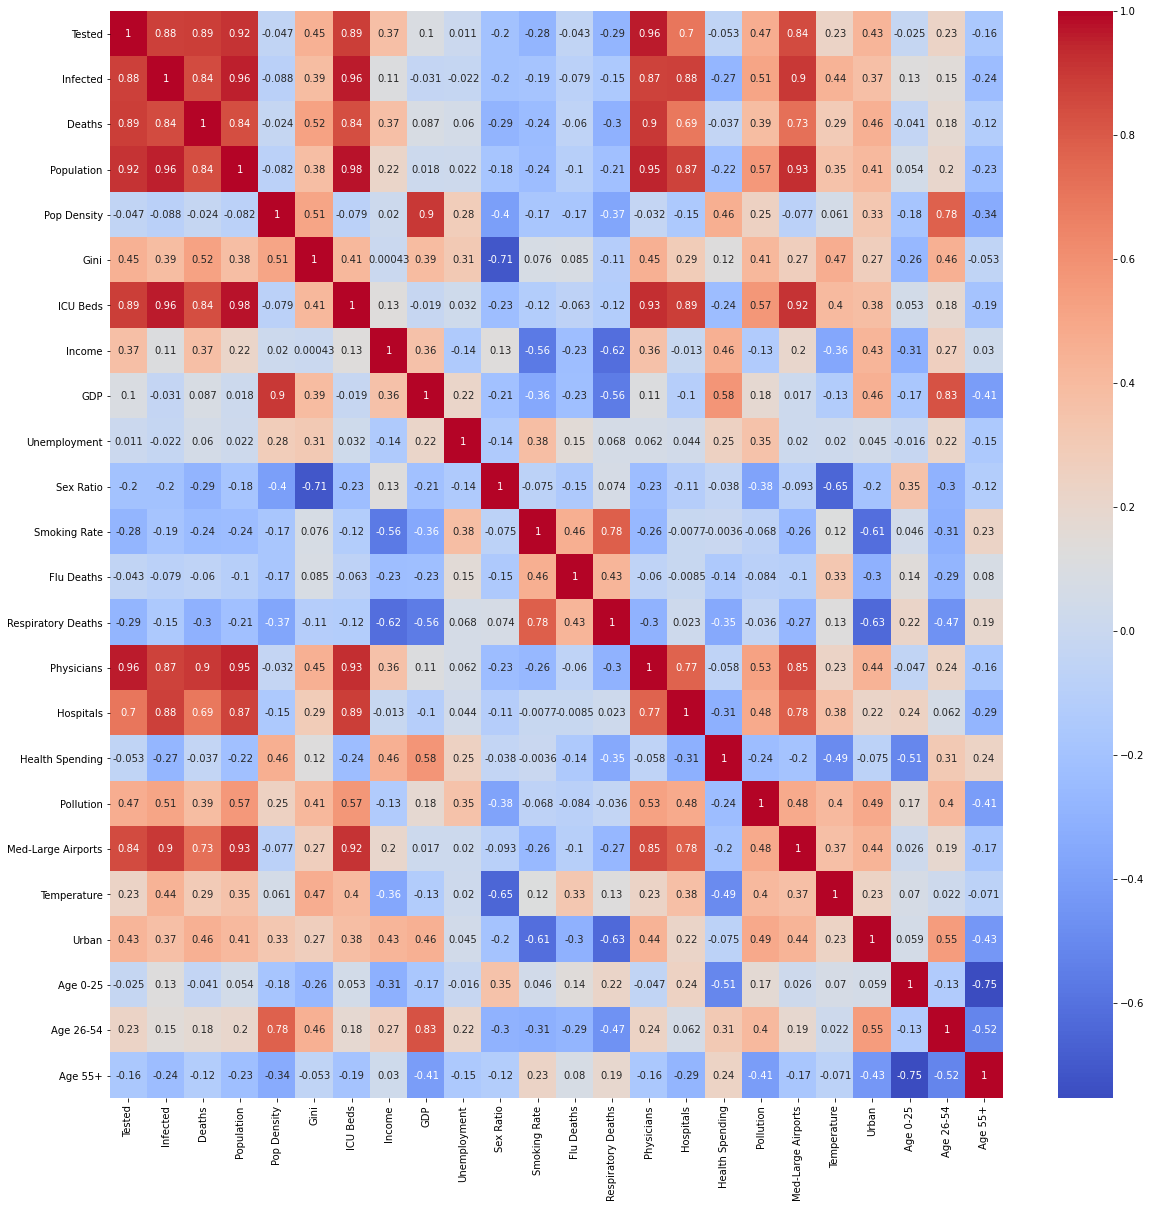

In [137]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

In [200]:
df = df.reindex(columns = ['Tested', 'Infected', 'Deaths', 'Population', 'ICU Beds', 'Physicians', 'Hospitals', 'Med-Large Airports']);
# df.tail?
df.tail(10).corr()
# aperçu : 10 derniers states présentant un coef de correlation tendant vers 1 avec les données réindexées 

,Tested,Infected,Deaths,Population,ICU Beds,Physicians,Hospitals,Med-Large Airports
Tested,1.000000,0.971501,0.940525,0.962585,0.973504,0.974539,0.945141,0.941004
Infected,0.971501,1.000000,0.981439,0.975409,0.981869,0.961004,0.988110,0.969433
Deaths,0.940525,0.981439,1.000000,0.989356,0.984979,0.969656,0.989803,0.979894
Population,0.962585,0.975409,0.989356,1.000000,0.985956,0.993034,0.978539,0.988085
ICU Beds,0.973504,0.981869,0.984979,0.985956,1.000000,0.979412,0.974407,0.967265
Physicians,0.974539,0.961004,0.969656,0.993034,0.979412,1.000000,0.959037,0.973488
Hospitals,0.945141,0.988110,0.989803,0.978539,0.974407,0.959037,1.000000,0.964173
Med-Large Airports,0.941004,0.969433,0.979894,0.988085,0.967265,0.973488,0.964173,1.000000


# 3.1 HeatMap related to "deaths" property

<AxesSubplot:>

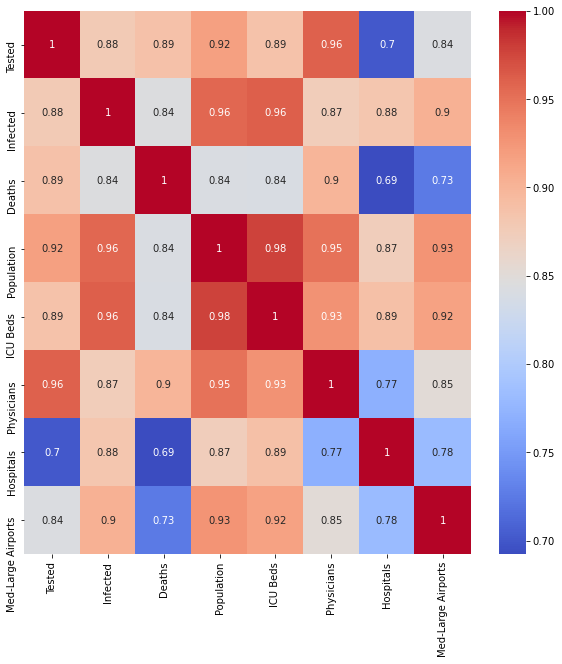

In [163]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

# 4 - Hypothesis and verification

# 4.1 : Description of our dataSet

In [186]:
# Pour repondre à l'hypothese, nous avons besoins d'obtenir une description statistique du jeu de données. 
# Notament pour vérifier que la standard deviation n'est pas 
df.describe?

In [187]:
df.describe()

,Tested,Infected,Deaths,Population,Pop Density,Gini,ICU Beds,Income,GDP,Unemployment,...,Physicians,Hospitals,Health Spending,Pollution,Med-Large Airports,Temperature,Urban,Age 0-25,Age 26-54,Age 55+
count,5.100000e+01,51.000000,51.000000,5.100000e+01,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,...,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,2.904946e+06,179626.666667,4357.745098,6.496451e+06,431.560508,0.466165,1466.411765,51597.607843,61497.333333,3.515686,...,19711.666667,101.921569,8332.156863,7.413725,1.215686,51.999020,74.107843,0.323529,0.376471,0.299020
std,3.590449e+06,208077.881595,5637.548491,7.450657e+06,1647.225920,0.023455,1562.124594,8224.387459,22648.274324,0.831233,...,22532.917088,88.881909,1256.751246,1.457535,1.758564,8.627992,14.885481,0.027116,0.019680,0.030936
min,1.340180e+05,2219.000000,58.000000,5.670250e+05,1.286300,0.406300,94.000000,37994.000000,37948.000000,2.200000,...,1172.000000,7.000000,5982.000000,4.400000,0.000000,26.600000,38.700000,0.260000,0.350000,0.210000
25%,8.216280e+05,46623.500000,650.500000,1.802113e+06,50.604850,0.452050,327.000000,45981.000000,51156.000000,2.850000,...,5656.000000,44.500000,7390.000000,6.650000,0.000000,45.300000,65.400000,0.305000,0.370000,0.290000
50%,1.792602e+06,120865.000000,2113.000000,4.499692e+06,108.049700,0.468000,1134.000000,49417.000000,57492.000000,3.400000,...,12205.000000,89.000000,8107.000000,7.400000,1.000000,51.700000,74.200000,0.320000,0.370000,0.300000
75%,3.403572e+06,208161.000000,4983.500000,7.587794e+06,223.983100,0.479500,1841.500000,56610.000000,65971.500000,3.800000,...,23991.500000,129.500000,9095.500000,8.150000,1.000000,58.300000,87.550000,0.340000,0.385000,0.310000
max,1.891250e+07,930628.000000,25838.000000,3.993749e+07,11814.541000,0.542000,7338.000000,74561.000000,200277.000000,5.800000,...,112906.000000,523.000000,11944.000000,12.800000,9.000000,70.700000,100.000000,0.420000,0.480000,0.370000


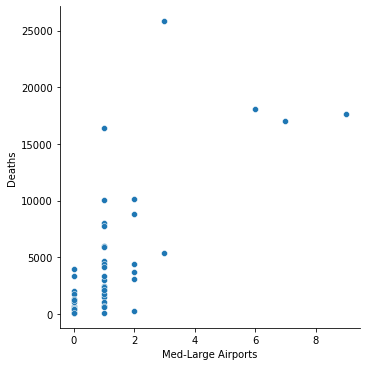

In [209]:
sns.relplot(data=df, x="Med-Large Airports", y="Deaths")

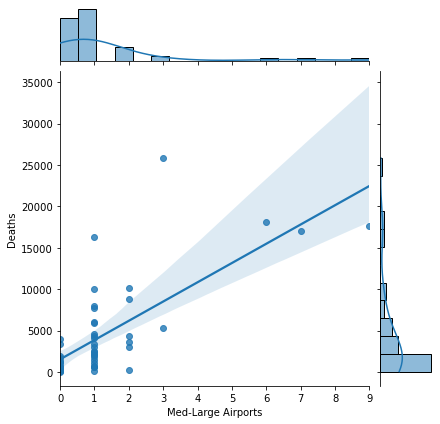

In [213]:
sns.jointplot(data=df, x="Med-Large Airports", y="Deaths", kind="reg")